In [130]:
from sklearn.datasets import fetch_openml
minist = fetch_openml('mnist_784', version=1)

In [131]:
minist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [132]:
x ,y = minist['data'] ,minist['target']
import numpy as np
y = y.astype(np.uint8)  # ✅ Fix the label type


In [133]:
X = x.to_numpy()

In [134]:
y.shape

(70000,)

In [135]:
x.shape

(70000, 784)

In [136]:
x.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
import matplotlib.pyplot as plt 


In [138]:
some_digit = x.to_numpy()[3600]
some_digit_image = some_digit.reshape(28,28)



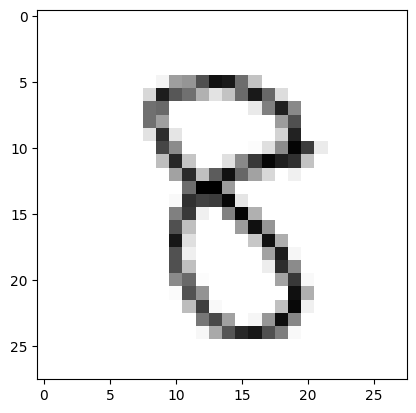

In [139]:
plt.imshow(some_digit_image,cmap="binary" , interpolation="nearest")


In [140]:
l1=[1,2,3,4]
l1[2:]

[3, 4]

In [141]:
x_train , x_test = X[0:60000] , x[60000:]
y_train , y_test = y[0:60000] , y[60000:]


In [142]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train , y_train  = x_train[shuffle_index] , y_train[shuffle_index]

In [143]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)



In [144]:
y_train

28521    1
21787    9
41805    1
2491     7
10610    5
        ..
59128    8
34593    4
26460    5
588      2
16447    1
Name: class, Length: 60000, dtype: int8

In [145]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [146]:
clf.fit(x_train,y_train_2)

LinearRegression()

In [147]:
clf.predict([some_digit])

array([0.05842919])

In [150]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf ,x_train , y_train_2, cv = 3 , scoring='accuracy')

C:\Users\aruns\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aruns\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
  File "C:\Users\aruns\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\aruns\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\aruns\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py", line 227, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\aruns\AppData\Roaming\Pyt

array([nan, nan, nan])

In [151]:
print(clf.predict(x_train[:5]))  # Should return something like [0 1 4 3 2]


[ 0.06938105  0.0305685   0.05824589 -0.01351507 -0.20049246]
